# Delivery Time(Simple Linear Regression)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings as wn

In [3]:
wn.filterwarnings('ignore')

In [4]:
df1=pd.read_csv('delivery_time.csv')

In [5]:
df1.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df1.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
df1=df1.rename(columns={'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'})

In [9]:
x=df1['Sorting_Time']
y=df1['Delivery_Time']

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

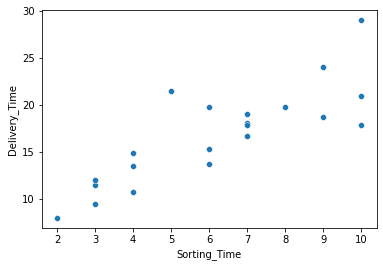

In [10]:
sns.scatterplot(x,y)

In [11]:
df1.corr()

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


<AxesSubplot:xlabel='Sorting_Time', ylabel='Density'>

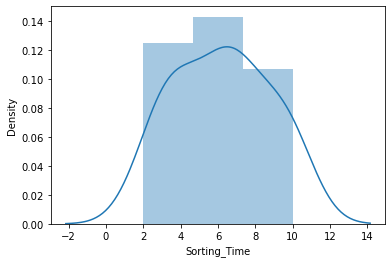

In [12]:
sns.distplot(x)

<AxesSubplot:xlabel='Delivery_Time', ylabel='Density'>

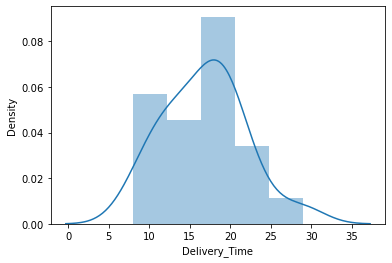

In [13]:
sns.distplot(y)

### Fitting a Linear Regression Model with Normal Dataset

In [14]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time~Sorting_Time",data = df1).fit()

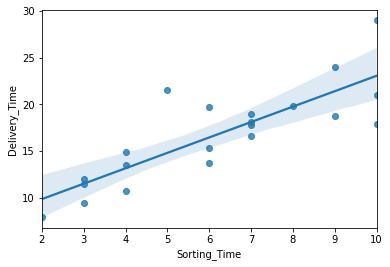

In [15]:
sns.regplot(x, y);

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           3.98e-06
Time:                        17:39:07   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model.params

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [18]:
model.tvalues, model.pvalues

(Intercept       3.823349
 Sorting_Time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_Time    0.000004
 dtype: float64)

In [19]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### Fitting a Linear regression with dataset Log Transformed

In [20]:
x1=np.log(df1['Sorting_Time'])
y1=np.log(df1['Delivery_Time'])

In [21]:
df2=pd.DataFrame({'Sorting_Time':x1,'Delivery_Time':y1})

In [22]:
df2.head()

,Sorting_Time,Delivery_Time
0,2.302585,3.044522
1,1.386294,2.602690
2,1.791759,2.983153
3,2.197225,3.178054
4,2.302585,3.367296


In [41]:
import statsmodels.formula.api as smf
model1 = smf.ols("Delivery_Time~Sorting_Time",data = df2).fit()

In [42]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 28 Jul 2021   Prob (F-statistic):           1.60e-07
Time:                        17:41:05   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.7420      0.133     13.086      0.000       1.463       2.021
Sorting_Time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
model1.rsquared_adj,model1.rsquared

(0.7601698413355158, 0.77216134926874)

### Predict for new data point 

In [43]:
x_new=pd.Series([11,10])
data_pred=pd.DataFrame(x_new,columns=['Sorting_Time'])

In [44]:
data_pred

,Sorting_Time
0,11
1,10


In [45]:
model.predict(data_pred)

0    24.721953
1    23.072933
dtype: float64

In [46]:
model1.predict(data_pred)

0    8.314733
1    7.717210
dtype: float64

# Salary Data(Simple Linear regression)

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
df3=pd.read_csv('Salary_Data.csv')

In [88]:
df3.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [93]:
df3.shape

(30, 2)

In [94]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [95]:
df3.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

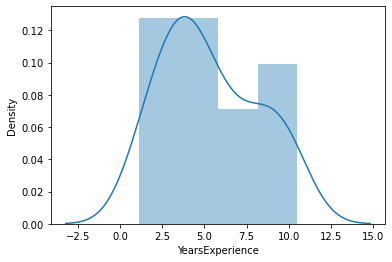

In [96]:
sns.distplot(df3['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

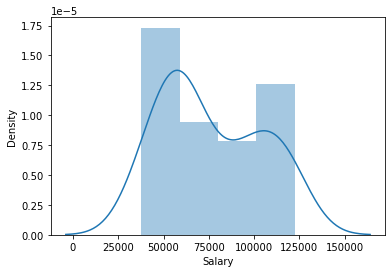

In [97]:
sns.distplot(df3['Salary'])

In [118]:
x2=df3.iloc[:,0:1]
y2=df3.iloc[:,1:]

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

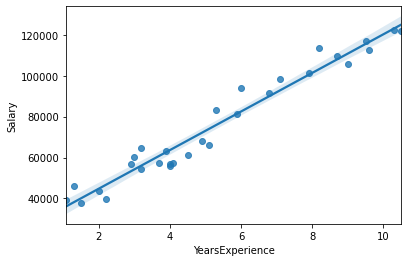

In [119]:
sns.regplot(x2,y2)

### Fitting a model with normal dataset 

In [120]:
from sklearn import linear_model,metrics

In [121]:
lm=linear_model.LinearRegression()

In [123]:
lm.fit(x2,y2)

LinearRegression()

In [133]:
lm.score(x2,y2)

0.9569566641435086

### Fitting a model with log Transformed dataset 

In [130]:
log_df3=np.log(df3)

In [158]:
log_df3.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


In [159]:
lm1=linear_model.LinearRegression()

In [173]:
x3=log_df3.iloc[:,0:1]
y3=log_df3.iloc[:,-1:]

In [176]:
lm1.fit(x3,y3)

LinearRegression()

In [177]:
lm1.score(x3,y3)

0.9052150725817151

### Predict a new data point

In [178]:
new_data=pd.Series([2.5,3.2])

In [179]:
x_pred=pd.DataFrame(new_data,columns=['YearsExprience'])

In [180]:
x_pred

,YearsExprience
0,2.5
1,3.2


In [127]:
y_pred=lm.predict(x_pred)

In [128]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
0,49417.106002
1,56032.079627


In [188]:
y_pred1=lm1.predict(x_pred)

array([[11.73326527],
       [12.12672745]])

In [189]:
y_pred1=pd.DataFrame(y_pred1)
y_pred1

,0
0,11.733265
1,12.126727
